<a href="https://colab.research.google.com/github/andraspalasti/deeplearning-hw/blob/main/notebooks/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q gdown

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Download dataset from google drive
!gdown 'https://drive.google.com/uc?id=1-3wKWfF2Q54OBjz0szOgQAgY-MliXm2h'

Downloading...
From (uriginal): https://drive.google.com/uc?id=1-3wKWfF2Q54OBjz0szOgQAgY-MliXm2h
From (redirected): https://drive.google.com/uc?id=1-3wKWfF2Q54OBjz0szOgQAgY-MliXm2h&confirm=t&uuid=87bfdbde-87ec-480e-8d82-dbf40760e854
To: /Users/andraspalasti/school/6th/deep-learning/homework/airbus-dataset.zip
100%|██████████████████████████████████████| 8.88G/8.88G [02:54<00:00, 51.0MB/s]


In [3]:
# Extract data
!mkdir -p data/processed
!unzip  airbus-dataset.zip

Archive:  airbus-dataset.zip
   creating: data/processed/test/
  inflating: data/processed/test/17a250a69.jpg  
  inflating: data/processed/test/1daed4093.jpg  
  inflating: data/processed/test/17f66f361.jpg  
  inflating: data/processed/test/14a52408d.jpg  
  inflating: data/processed/test/1850f6d7b.jpg  
  inflating: data/processed/test/13ef1eeff.jpg  
  inflating: data/processed/test/14bafa5d5.jpg  
  inflating: data/processed/test/15a3da343.jpg  
  inflating: data/processed/test/161d97a93.jpg  
  inflating: data/processed/test/1da7c1a90.jpg  
  inflating: data/processed/test/1cbe54e5e.jpg  
  inflating: data/processed/test/17199b2d1.jpg  
  inflating: data/processed/test/1c603db77.jpg  
  inflating: data/processed/test/1cfa5270d.jpg  
  inflating: data/processed/test/1607be2b8.jpg  
  inflating: data/processed/test/1d61f5861.jpg  
  inflating: data/processed/test/1612fab01.jpg  
  inflating: data/processed/test/18c38f65a.jpg  
  inflating: data/processed/test/16bf1ae3d.jpg  
  infl

In [4]:
%matplotlib inline
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

In [5]:
proc_dir = Path('data') / 'processed'

train_segmentations = pd.read_csv(proc_dir / 'train_ship_segmentations.csv')
train_segmentations['EncodedPixels'] = train_segmentations['EncodedPixels'].fillna('')
train_imgs_dir = proc_dir / 'train'

train_segmentations

ImageId                                      EncodedPixels
0      00003e153.jpg                                                   
1      0001124c7.jpg                                                   
2      000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3      000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4      000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...              ...                                                ...
93162  fff909871.jpg  441057 2 441825 4 442592 7 443360 9 444128 11 ...
93163  fffcb6464.jpg  222782 4 223550 10 224318 14 225086 14 225854 ...
93164  fffd924fb.jpg  110011 5 110779 5 111547 5 112315 5 113083 5 1...
93165  fffd924fb.jpg  198440 8 199208 8 199976 8 200744 8 201512 8 2...
93166  fffdd2377.jpg  333603 7 334359 19 335120 26 335888 26 336656 ...

[93167 rows x 2 columns]

In [6]:
# Beacause the ships on the images are segmented using run length encoding
# we are going to need a function to decode that
def decode_rle(rle: str, img_size: tuple[int,int]) -> np.ndarray:
    rle = rle.split()
    starts, lengths = [np.asarray(x, dtype=int)
                        for x in (rle[0:][::2], rle[1:][::2])]
    starts -= 1
    ends = starts + lengths
    mask = np.zeros(img_size[0]*img_size[0], dtype=np.bool_)
    for lo, hi in zip(starts, ends):
        mask[lo:hi] = True
    mask = mask.reshape((img_size[1], img_size[0]))
    return mask.transpose()

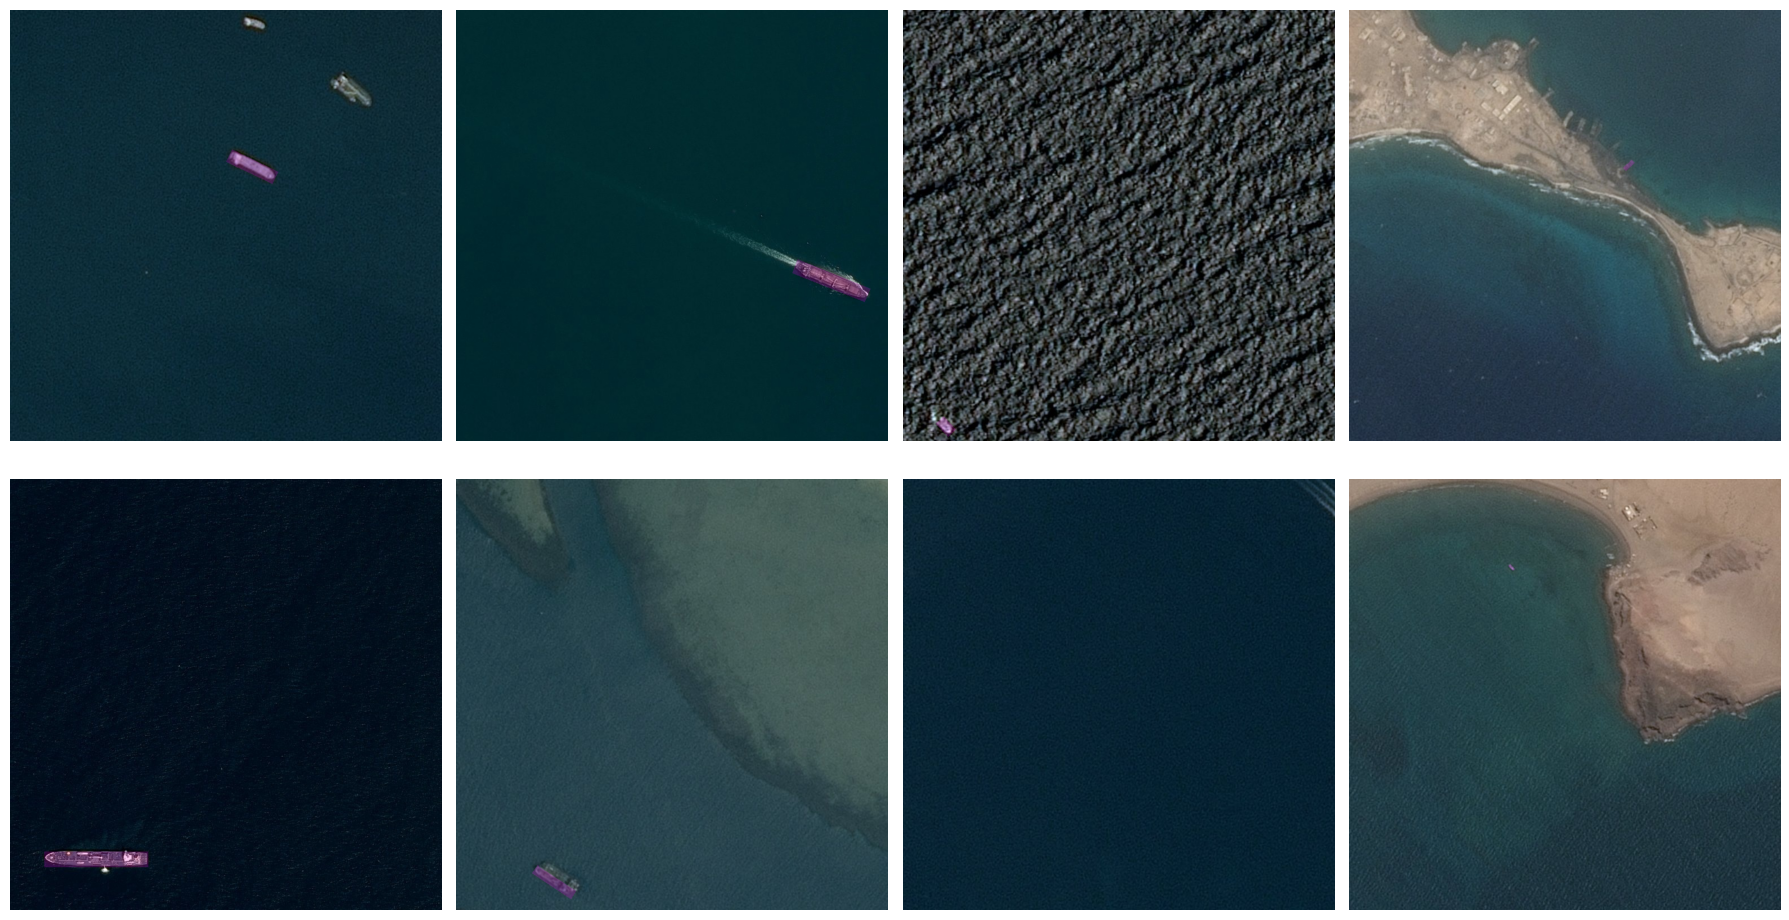

In [7]:
N = 8
indexes = np.random.randint(0, len(train_segmentations), N)

plt.figure(figsize=(18, 10))
for i, ix in enumerate(indexes):
    image_id, rle = train_segmentations.iloc[ix]

    image = Image.open(train_imgs_dir / image_id).convert('RGBA')
    segmentation = decode_rle(rle, (image.width, image.height))
    
    img_mask = np.zeros((image.height, image.width, 4), dtype=np.int8)
    img_mask[segmentation] = np.array([255, 0, 255, 50])

    image.alpha_composite(Image.fromarray(img_mask, 'RGBA'))

    plt.subplot(2, N//2, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()